## Klasterizavimo algoritmai

- Mėginame klasterizavimo algoritmus sintetiniams duomenims
- Vizualizuojame gautus rezultatus

In [10]:
#įsikeliame reikalingas bibliotekas

import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [13]:
X, y = datasets.make_classification(n_classes=3,
                                    n_samples=600,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_clusters_per_class=1,
                                    random_state=8)

In [12]:
print('Data shape: {}'.format(X.shape))
print('Labels shape: {}'.format(y.shape))
print('First 10 datapoints: ')
print(X[:10])
print('First 10 labels: ')
print(y[:10])

Data shape: (600, 2)
Labels shape: (600,)
First 10 datapoints: 
[[-1.37645193 -1.23765765]
 [-0.94649375 -1.20956287]
 [-0.49793839  1.59204518]
 [-1.19944865  0.78765423]
 [-0.33941354  1.89603382]
 [ 1.77598503 -2.96009794]
 [-0.5877067   1.13750518]
 [-1.10630681  0.88754346]
 [-0.61960266  1.24771248]
 [-0.33380048  1.3216363 ]]
First 10 labels: 
[2 2 1 1 1 0 1 1 1 1]


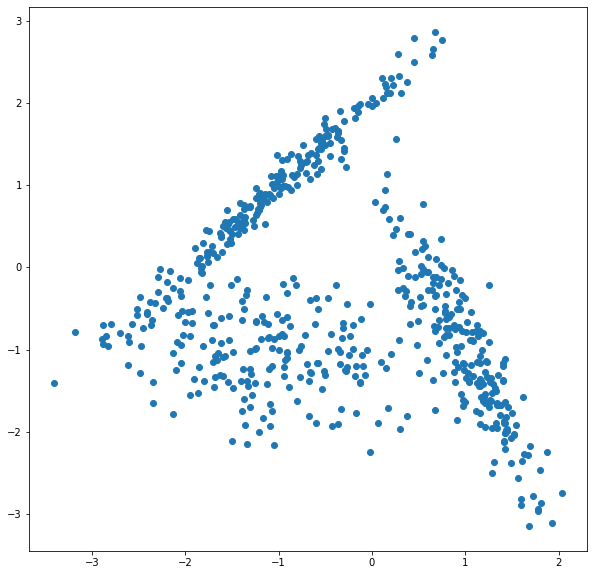

In [14]:
plt.scatter(X[:, 0], X[:, 1])

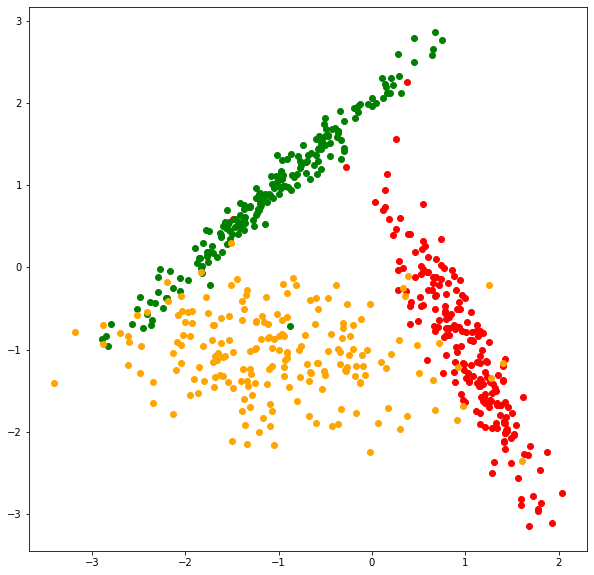

In [5]:
for i in range(3): 
    rows = np.where(y == i)
    if i == 0:
        color = 'red'
    elif i == 1:
        color = 'green'
    else:
        color = 'orange'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)
plt.show()

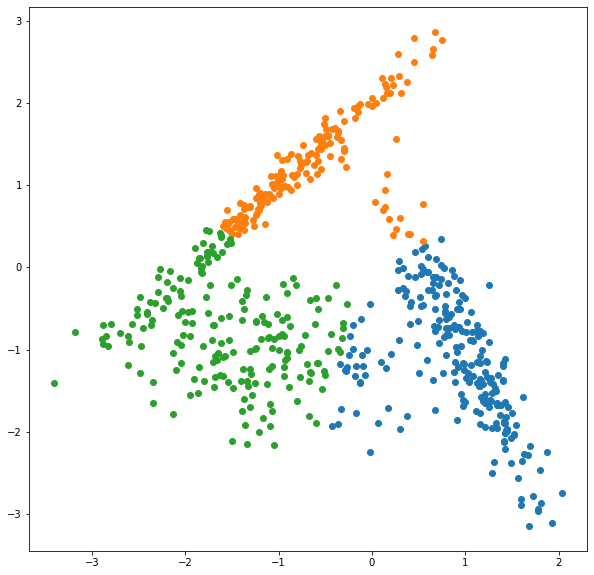

In [20]:
#K-Means


from sklearn.cluster import KMeans

#sukuriame modelį, nurodome reikalingus hiperparametrus
model = KMeans(n_clusters=3)

#"Mokome"
model.fit(X)

#Atliekame spėjimus
y_pred = model.predict(X)

#Išrenkame klasterius
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

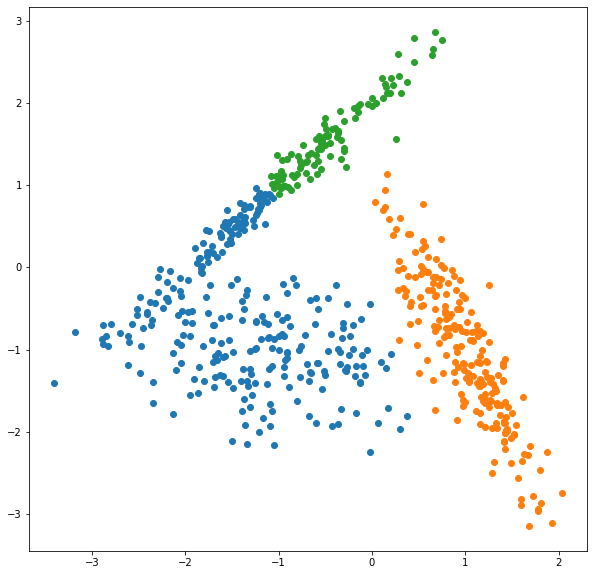

In [22]:
#Agglomerative 

from sklearn.cluster import AgglomerativeClustering

#sukuriame modelį, nurodome reikalingus hiperparametrus
model = AgglomerativeClustering(n_clusters=3)

#Atliekame spėjimus
y_pred = model.fit_predict(X)


#Išrenkame klasterius
clusters = np.unique(y_pred)

for cluster in clusters:

    rows = np.where(y_pred == cluster)

    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

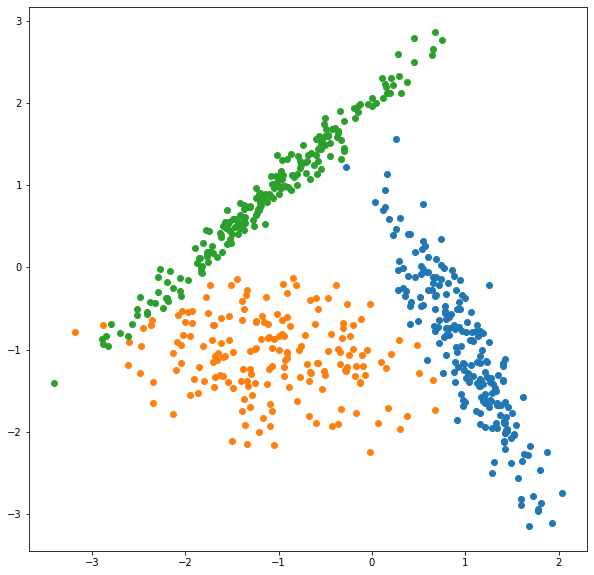

In [8]:
#Gaussian Mixture

from sklearn.mixture import GaussianMixture

#sukuriame modelį, nurodome reikalingus hiperparametrus
model = GaussianMixture(n_components=3)


# "Mokome"
model.fit(X)


# Atliekame spėjimus
y_pred = model.predict(X)

# Atliekame spėjimus
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

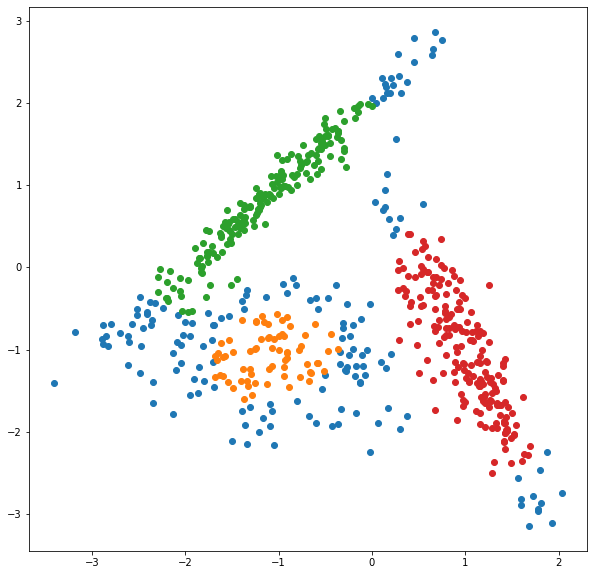

In [9]:
# DBSCAN

from sklearn.cluster import DBSCAN


#sukuriame modelį, nurodome reikalingus hiperparametrus

model = DBSCAN(eps=0.4, min_samples=30)

# Atliekame spėjimus
y_pred = model.fit_predict(X)

#Atrenkame gautus klasterius
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

## Užduotis

- Suklasterizuoti pateiktus duomenis keliais skirtingai algoritmais
- Vizualizuoti rezultatus
- Kuris algoritmas veikia geriausiai? Kodėl neveikia kiti?

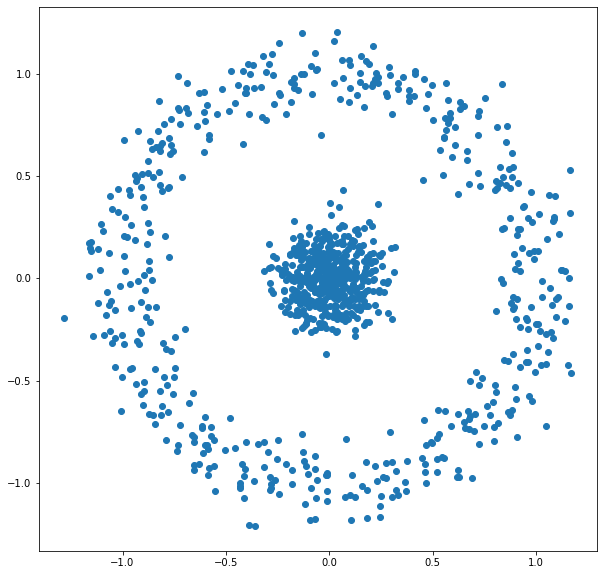

In [23]:
X, y = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1, random_state=None, factor=0.1)

plt.scatter(X[:, 0], X[:, 1])

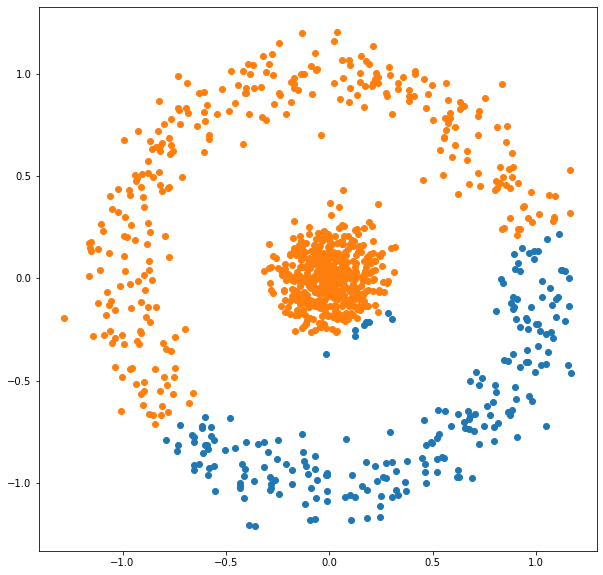

In [35]:
#K-Means


from sklearn.cluster import KMeans

#sukuriame modelį, nurodome reikalingus hiperparametrus
model = KMeans(n_clusters=2)

#"Mokome"
model.fit(X)

#Atliekame spėjimus
y_pred = model.predict(X)

#Išrenkame klasterius
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

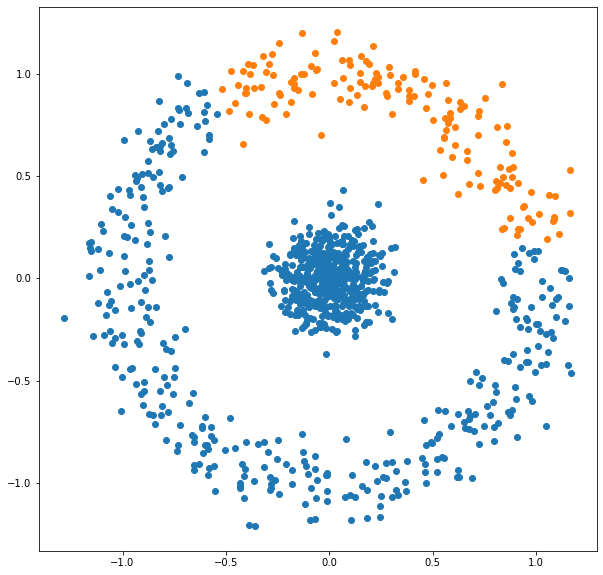

In [34]:
#Agglomerative 

from sklearn.cluster import AgglomerativeClustering

#sukuriame modelį, nurodome reikalingus hiperparametrus
model = AgglomerativeClustering(n_clusters=2)

#Atliekame spėjimus
y_pred = model.fit_predict(X)


#Išrenkame klasterius
clusters = np.unique(y_pred)

for cluster in clusters:

    rows = np.where(y_pred == cluster)

    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

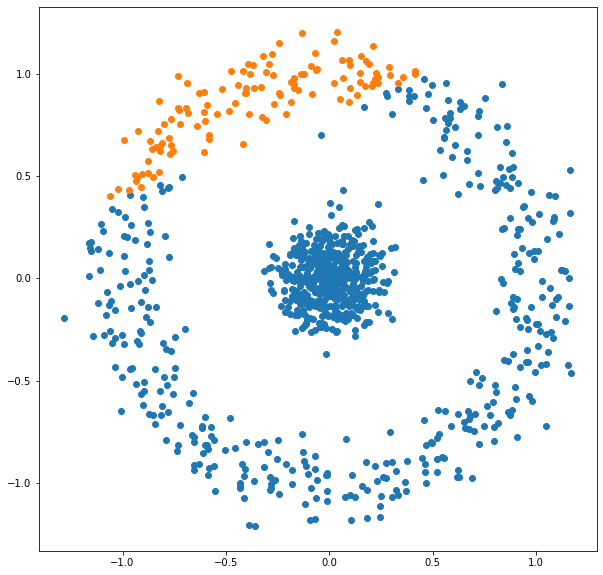

In [33]:
#Gaussian Mixture

from sklearn.mixture import GaussianMixture

#sukuriame modelį, nurodome reikalingus hiperparametrus
model = GaussianMixture(n_components=2)


# "Mokome"
model.fit(X)


# Atliekame spėjimus
y_pred = model.predict(X)

# Atliekame spėjimus
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

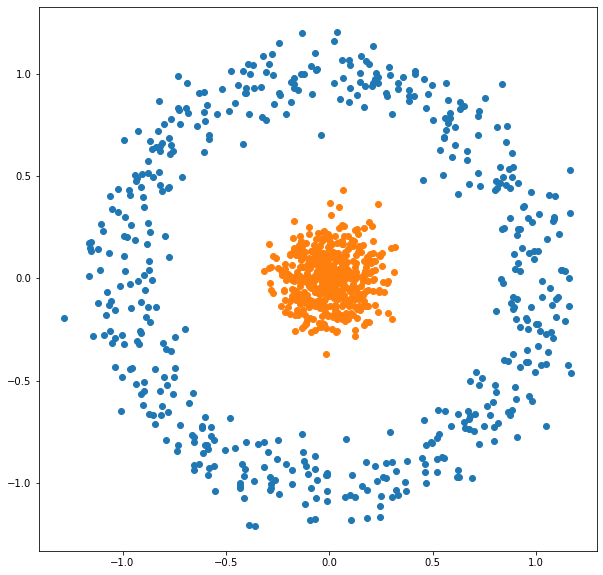

In [47]:
# DBSCAN

from sklearn.cluster import DBSCAN


#sukuriame modelį, nurodome reikalingus hiperparametrus

model = DBSCAN(eps=0.3, min_samples=30)

# Atliekame spėjimus
y_pred = model.fit_predict(X)

#Atrenkame gautus klasterius
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()

0.6574919674294543


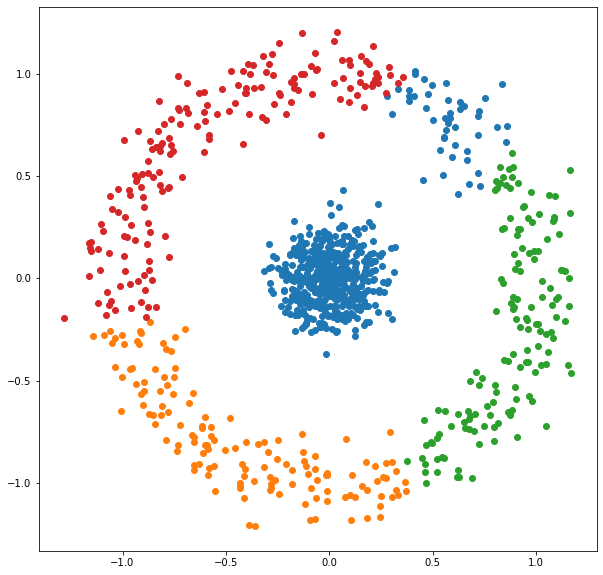

In [64]:
# MeanShift centroid based algoritmas
# Pats aptinka clusterius (sliding window metodas)

from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.4, n_samples=X.shape[0])
print(bandwidth)
#sukuriame modelį, nurodome reikalingus hiperparametrus

model = MeanShift(bandwidth=bandwidth, bin_seeding=True)


model.fit(X)
# Atliekame spėjimus
y_pred = model.predict(X)

#Atrenkame gautus klasterius
clusters = np.unique(y_pred)

for cluster in clusters:
    rows = np.where(y_pred == cluster)
    plt.scatter(X[rows, 0], X[rows, 1])

plt.show()


In [59]:
X.shape

(1000, 2)